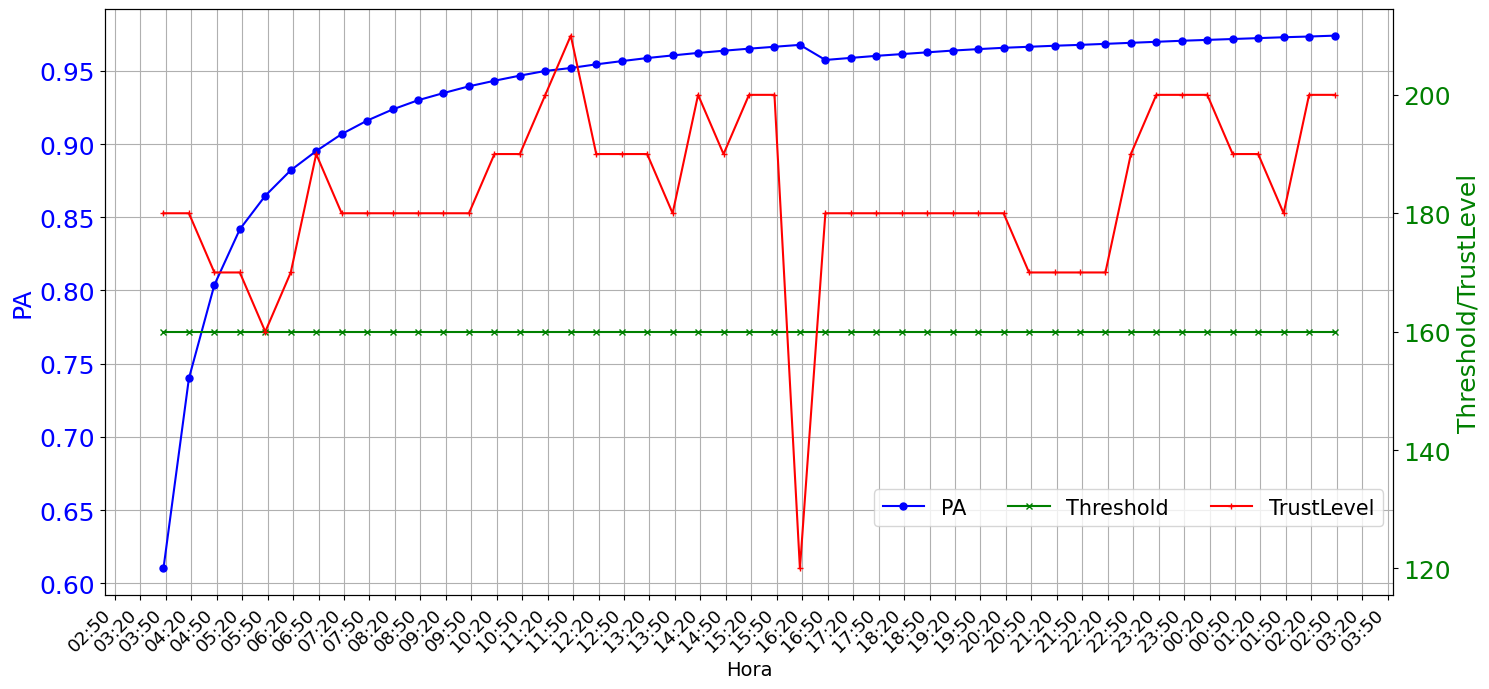

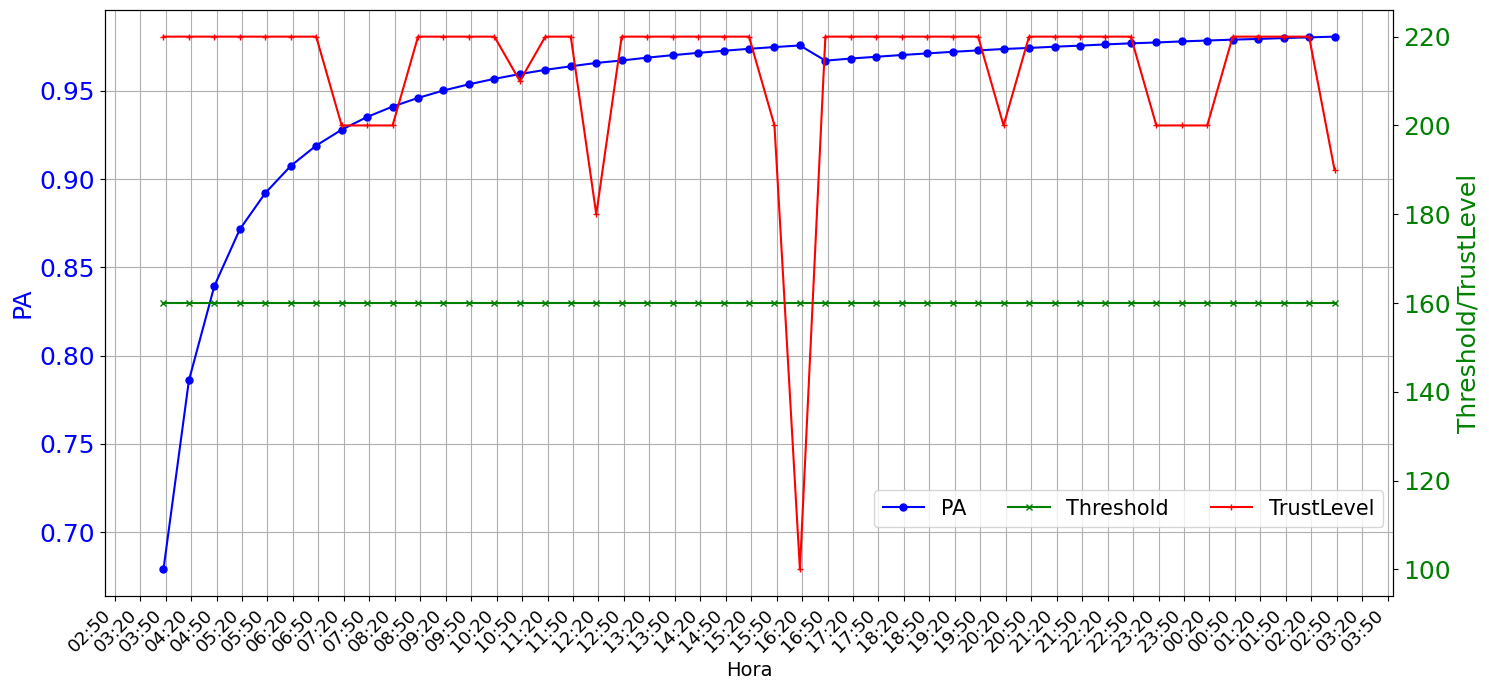

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

def processar_e_gerar_grafico(caminho_arquivo):
    # Ler o arquivo CSV
    df = pd.read_csv(caminho_arquivo, delimiter=';')

    # Converter a coluna 'date' para o tipo datetime e garantir que os dados estão ordenados por data
    df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)
    df = df.dropna(subset=['date'])  # Remover linhas onde a data não pôde ser convertida
    df.sort_values('date', inplace=True)

    # Converter as colunas numéricas para float
    df['pa'] = pd.to_numeric(df['pa'], errors='coerce').round(4)
    df['threshold'] = pd.to_numeric(df['threshold'], errors='coerce')
    df['trust_level'] = pd.to_numeric(df['trust_level'], errors='coerce')

    # Criar o gráfico com duas linhas de eixo y
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Configurações do eixo Y primário (PA)
    color_pa = 'blue'
    ax1.plot(df['date'], df['pa'], 'o-', color=color_pa, label='PA', markersize=5)
    ax1.set_xlabel('Hora', fontsize=14)
    ax1.set_ylabel('PA', color=color_pa, fontsize=18)
    ax1.tick_params(axis='y', labelcolor=color_pa, labelsize=18)

    # Defina o intervalo de gravação dos dados (em minutos)
    intervalo_gravacao = 30  # exemplo: os dados são gravados a cada 15 minutos

    # Defina o intervalo para os ticks do eixo X (em minutos)
    intervalo_ticks = 30  # exemplo: os ticks são exibidos a cada 30 minutos

    # Configurar o formato do eixo X para datas e o intervalo de exibição dos ticks
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=intervalo_ticks))
    plt.xticks(rotation=45, ha='right', fontsize=13)

    # Adicionar grid
    ax1.grid(True)

    # Configurações do eixo Y secundário (Threshold e TrustLevel)
    ax2 = ax1.twinx()
    color_threshold = 'green'
    color_trustLevel = 'red'
    ax2.plot(df['date'], df['threshold'], 'x-', color=color_threshold, label='Threshold', markersize=5)
    ax2.plot(df['date'], df['trust_level'], '+-', color=color_trustLevel, label='TrustLevel', markersize=5)
    ax2.set_ylabel('Threshold/TrustLevel', color=color_threshold, fontsize=18)  
    ax2.tick_params(axis='y', labelcolor=color_threshold, labelsize=18)         
    
    
    # Adicionar legendas com posicionamento automático
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    #ax1.legend(lines + lines2, labels + labels2, loc='best', fontsize=12, ncol=3))
    #ax1.legend(lines + lines2, labels + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=12, ncol=3)
    ax1.legend(lines + lines2, labels + labels2, loc='lower right', bbox_to_anchor=(1, 0.1), fontsize=15, ncol=3)


    # Adicionar título ao gráfico
    plt.title('')

    # Ajustar o layout para evitar sobreposição dos rótulos e da legenda
    plt.tight_layout()

    # Salva o gráfico em formato PNG no mesmo diretório do arquivo CSV
    #caminho_grafico = os.path.join(os.path.dirname(caminho_arquivo), 'PA.pdf')
    #fig = plt.gcf()
    #fig.patch.set_facecolor('white')
    #fig.patch.set_alpha(0)
    #fig.savefig(caminho_grafico, format='pdf', bbox_inches='tight', pad_inches=0, facecolor=fig.get_facecolor(), edgecolor='none')

    
    # Salva o gráfico em formato PDF no mesmo diretório do arquivo CSV
    caminho_grafico_pdf = os.path.join(os.path.dirname(caminho_arquivo), 'PA.pdf')
    plt.savefig(caminho_grafico_pdf, dpi=600)

    # Exibir o gráfico e fechar
    plt.show()
    plt.close()

# Lista de endereços de arquivos
caminhos = [
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/grenoble/5 segundos - 7_Experimento_389054/statistic.csv",
    "C:/Users/Abadio/Desktop/Gráficos/Logs/Graficos_Artigos/strasbourg/5 segundos - 7_Experimento_389053/statistic.csv"   
]

# Processar cada arquivo na lista
for caminho in caminhos:
    processar_e_gerar_grafico(caminho)
